In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, fowlkes_mallows_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from Config import df

In [30]:
X = df[["S1", "C1","S2", "C2", "S3", "C3", "S4", "C4", "S5", "C5"]]
y = df['CLASS']
X

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,10,1,11,1,13,1,12,1,1
1,2,11,2,13,2,10,2,12,2,1
2,3,12,3,11,3,13,3,10,3,1
3,4,10,4,11,4,1,4,13,4,12
4,4,1,4,13,4,12,4,11,4,10
...,...,...,...,...,...,...,...,...,...,...
1025005,3,1,1,12,2,9,4,9,2,6
1025006,3,3,4,5,2,7,1,4,4,3
1025007,1,11,4,7,3,9,1,13,2,7
1025008,3,11,1,8,1,1,3,13,2,8


In [5]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Decision Tree Classifier
print("---------- DecisionTreeClassifier ----------")
hands_fit = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_pred = hands_fit.predict(X_test)
scores = cross_val_score(hands_fit, X, y, cv=5)
print("Completado con una precisión de: ", scores, "\n")
print(classification_report(y_test, y_pred))
fmi = fowlkes_mallows_score(y_test, y_pred)
print("Fowlkes-Mallows Index:", fmi)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


---------- DecisionTreeClassifier ----------
Completado con una precisión de:  [0.62973044 0.56232622 0.64373518 0.63718403 0.65170584] 

              precision    recall  f1-score   support

           0       0.73      0.72      0.73    102428
           1       0.61      0.61      0.61     86945
           2       0.28      0.32      0.30      9691
           3       0.35      0.39      0.37      4352
           4       0.27      0.30      0.28       808
           5       0.12      0.18      0.14       405
           6       0.18      0.20      0.19       308
           7       0.14      0.13      0.13        60
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2

    accuracy                           0.64    205002
   macro avg       0.27      0.29      0.28    205002
weighted avg       0.65      0.64      0.65    205002

Fowlkes-Mallows Index: 0.5370886815285816
Accuracy Score: 0.643554697027346


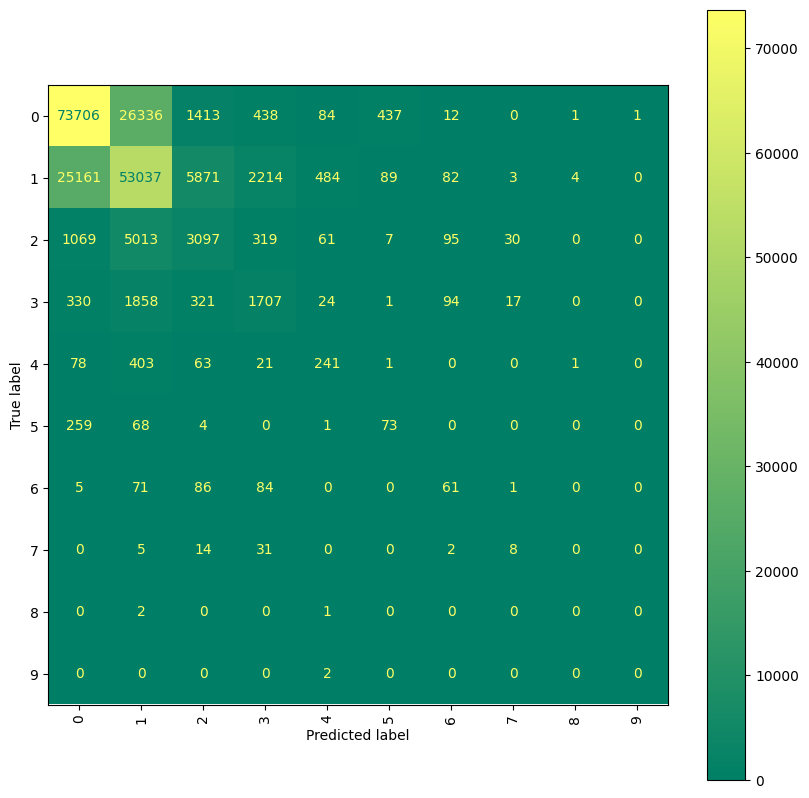

In [5]:
result_confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = result_confusion_matrix)

# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = cm_display.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [6]:
# Random Forest Classifier
print("---------- RandomForestClassifier ----------")
fit = RandomForestClassifier(random_state=1).fit(X_train, y_train)
y_predV2 = fit.predict(X_test)
scores = cross_val_score(fit, X, y, cv=5)
print("Completado con una precisión de: ", scores, "\n")
print(classification_report(y_test, y_predV2))
fmiV2 = fowlkes_mallows_score(y_test, y_predV2)
print("Fowlkes-Mallows Index:", fmiV2)
accuracy = accuracy_score(y_test, y_predV2)
print("Accuracy Score:", accuracy)

---------- RandomForestClassifier ----------
Completado con una precisión de:  [0.75182681 0.74724149 0.75923162 0.75548043 0.7636267 ] 

              precision    recall  f1-score   support

           0       0.79      0.92      0.85    102428
           1       0.73      0.72      0.73     86945
           2       0.62      0.04      0.07      9691
           3       0.82      0.08      0.14      4352
           4       0.50      0.01      0.02       808
           5       0.97      0.08      0.15       405
           6       0.60      0.01      0.02       308
           7       0.00      0.00      0.00        60
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2

    accuracy                           0.77    205002
   macro avg       0.50      0.18      0.20    205002
weighted avg       0.76      0.77      0.74    205002

Fowlkes-Mallows Index: 0.6845633747603195


/Users/davinanaya/opt/anaconda3/envs/ml-imgs/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/davinanaya/opt/anaconda3/envs/ml-imgs/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/davinanaya/opt/anaconda3/envs/ml-imgs/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

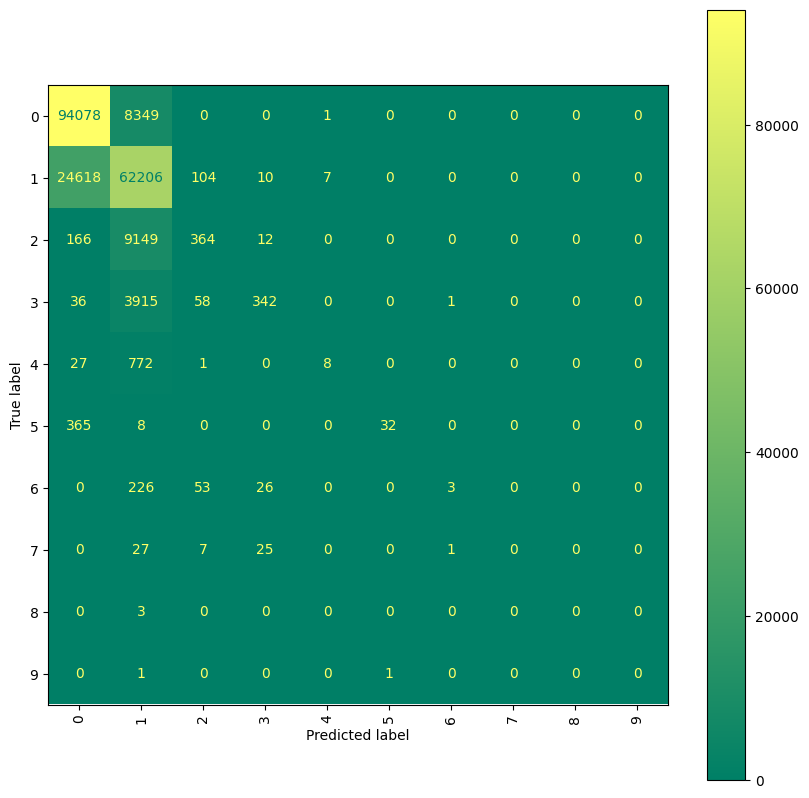

In [7]:
result_confusion_matrixV2 = confusion_matrix(y_test, y_predV2)
cm_displayV2 = ConfusionMatrixDisplay(confusion_matrix = result_confusion_matrixV2)

# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = cm_displayV2.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [7]:
print("---------- KNeighborsClassifier ----------")
K_Neighbors = KNeighborsClassifier().fit(X_train, y_train)
y_predV3 = K_Neighbors.predict(X_test)
scores = cross_val_score(K_Neighbors, X, y, cv=5)
print("Completado con una precisión de: ", scores, "\n")
print(classification_report(y_test, y_predV3))
fmiV3 = fowlkes_mallows_score(y_test, y_predV3)
print("Fowlkes-Mallows Index:", fmiV3)
accuracy = accuracy_score(y_test, y_predV3)
print("Accuracy Score:", accuracy)

---------- KNeighborsClassifier ----------
Completado con una precisión de:  [0.617433   0.61919884 0.61953054 0.61845738 0.6182086 ] 

              precision    recall  f1-score   support

           0       0.66      0.76      0.70    102428
           1       0.58      0.56      0.57     86945
           2       0.35      0.08      0.13      9691
           3       0.30      0.04      0.08      4352
           4       0.19      0.02      0.04       808
           5       0.50      0.00      0.00       405
           6       0.12      0.01      0.01       308
           7       0.00      0.00      0.00        60
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2

    accuracy                           0.62    205002
   macro avg       0.27      0.15      0.15    205002
weighted avg       0.60      0.62      0.60    205002

Fowlkes-Mallows Index: 0.5328278534260951
Accuracy Score: 0.6181890908381381


/Users/davinanaya/opt/anaconda3/envs/ml-imgs/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/davinanaya/opt/anaconda3/envs/ml-imgs/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/davinanaya/opt/anaconda3/envs/ml-imgs/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

'print("---------- SupportVectorMachine ----------")\nsvm_classifier = SVC(kernel=\'linear\').fit(X_train, y_train)\ny_predV3 = svm_classifier.predict(X_test)\nscores = cross_val_score(svm_classifier, X, y, cv=5)\nprint("Completado con una precisión de: ", scores, "\n")\nprint(classification_report(y_test, y_predV3))\nfmiV3 = fowlkes_mallows_score(y_test, y_predV3)\nprint("Fowlkes-Mallows Index:", fmiV3)'

In [37]:
feature_names = ["S1", "C1", "S2", "C2", "S3", "C3", "S4", "C4", "S5", "C5"]
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    X = X.to_numpy()
    y = y.to_numpy()

    # Definir los límites del gráfico
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Crear una cuadrícula de puntos
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predecir en la cuadrícula de puntos
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Crear el gráfico
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('orange', 'cornflowerblue')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20, cmap=ListedColormap(('darkorange', 'darkblue')))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.show()

# Graficar la frontera de decisión
plot_decision_boundary(K_Neighbors, X, y, title="KNN Decision Boundary (k=5)")

/Users/davinanaya/opt/anaconda3/envs/ml-imgs/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but KNeighborsClassifier is expecting 10 features as input.

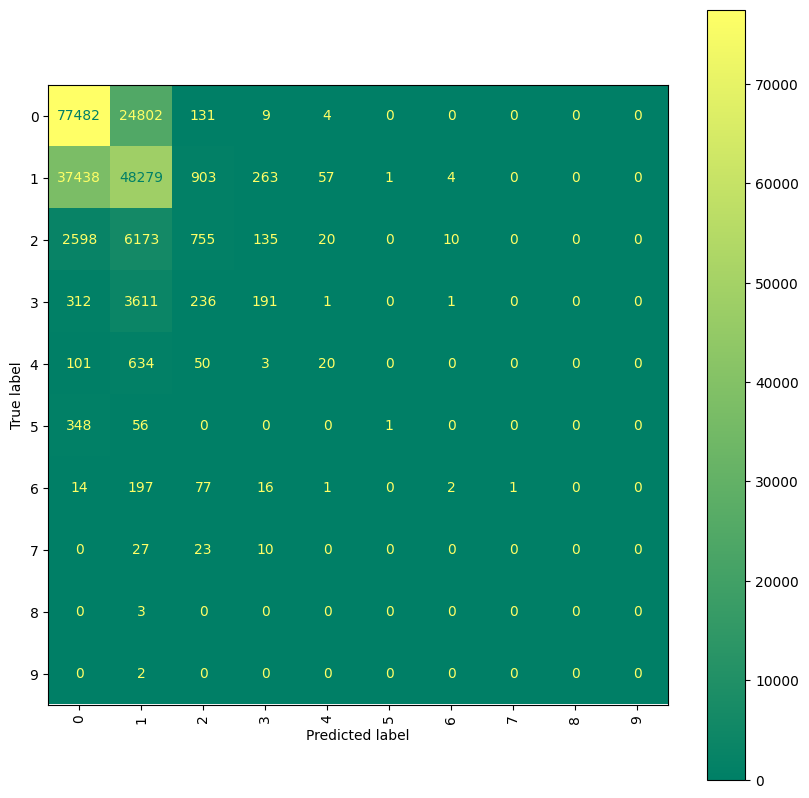

In [38]:
result_confusion_matrixV3 = confusion_matrix(y_test, y_predV3)
cm_displayV3 = ConfusionMatrixDisplay(confusion_matrix = result_confusion_matrixV3)

# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = cm_displayV3.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()